In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import datetime
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
data = pd.read_excel("D:\\sample files\\timedata.xlsx", sheet_name="Sheet1")
data.set_index('day', inplace=True)
data

,sales
day,
2021-01-01,100
2021-01-02,200
2021-01-03,200
2021-01-04,100
2021-01-05,300
2021-01-06,200
2021-01-07,300
2021-01-08,400
2021-01-09,500


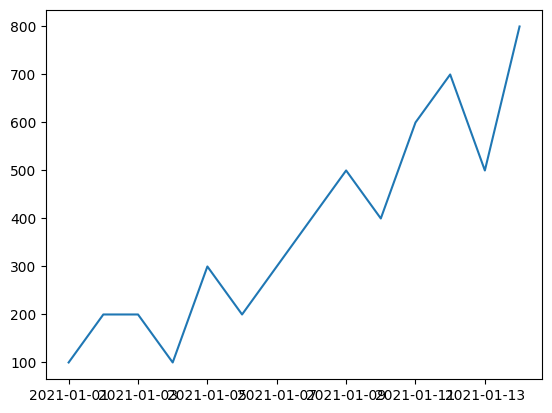

In [40]:
plt.plot(data.index, data["sales"])

In [167]:
#ignore
index= pd.date_range(start='2021-01-01', end='2022-3-3', freq='M')
data.index = index
data.drop("year", axis=1, inplace=True)
print(data)

               f2
2021-01-31  100.0
2021-02-28  200.0
2021-03-31  200.0
2021-04-30  100.0
2021-05-31  300.0
2021-06-30  200.0
2021-07-31  300.0
2021-08-31  600.0
2021-09-30  500.0
2021-10-31  400.0
2021-11-30  200.0
2021-12-31    NaN
2022-01-31    NaN
2022-02-28    NaN


In [3]:
train = data.iloc[0:-3,:]
test = data.iloc[-3:,:]
test

,sales
day,
2021-01-12,700
2021-01-13,500
2021-01-14,800


<h1>Simple Exponential Smoothing

Alpha is : 0.2 & MSE is : 322.3864764896563 


C:\Users\EdwinVivekN\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


count    3.000000e+00
mean     3.693832e+02
std      6.961869e-14
min      3.693832e+02
25%      3.693832e+02
50%      3.693832e+02
75%      3.693832e+02
max      3.693832e+02
Name: forecast values with alpha=0.2, dtype: float64

Text(0.5, 1.0, 'Time vs Sales')

<Axes: title={'center': 'Time vs Sales'}, xlabel='day', ylabel='sales'>

<Axes: title={'center': 'Time vs Sales'}, xlabel='day', ylabel='sales'>

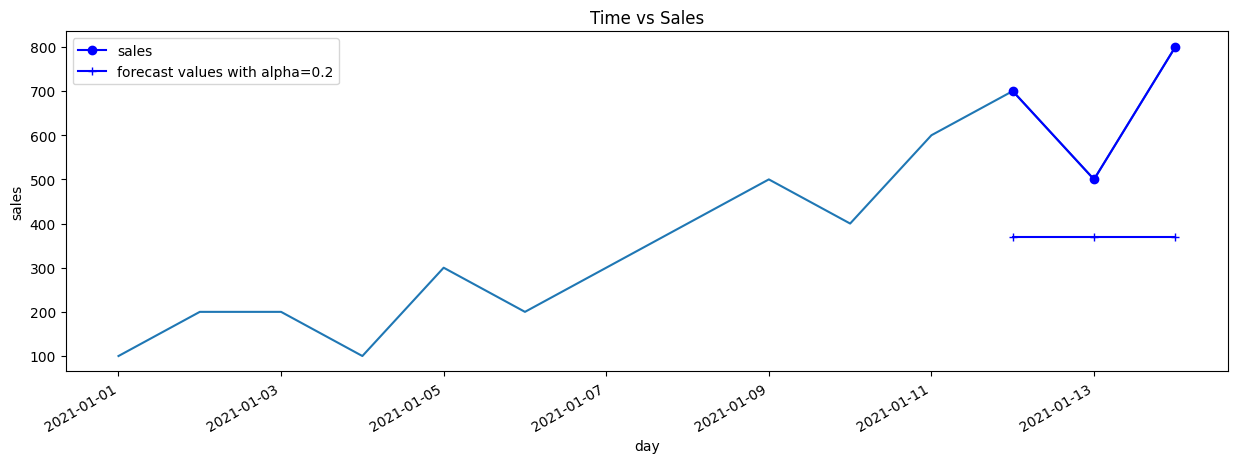

In [4]:
#Simple Exponential Smoothing

#First Instance
ins1 = SimpleExpSmoothing(train).fit(smoothing_level=0.2,optimized=False)
ins_cast1 = ins1.forecast(3).rename('forecast values with alpha=0.2')

mse = mean_squared_error(test, ins_cast1.to_frame(), squared=False)
alpha = ins1.model.params['smoothing_level']
print('Alpha is : {} & MSE is : {} '.format(alpha, mse))
ins_cast1.describe()

fig, ax = plt.subplots(figsize=(15,5))
chart = sns.lineplot(x='day', y = 'sales', data=data)
chart.set_title("Time vs Sales")
test.plot(ax=ax, color='blue', marker='o', legend=True)

ins_cast1.plot(marker='+', ax=ax, color='blue', legend=True)
#ins1.fittedvalues.plot(marker='+', ax=ax, color='blue')





C:\Users\EdwinVivekN\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\EdwinVivekN\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='day'>

<Axes: xlabel='day'>

<Axes: xlabel='day'>

<Axes: xlabel='day'>

<Axes: xlabel='day'>

<Axes: xlabel='day'>

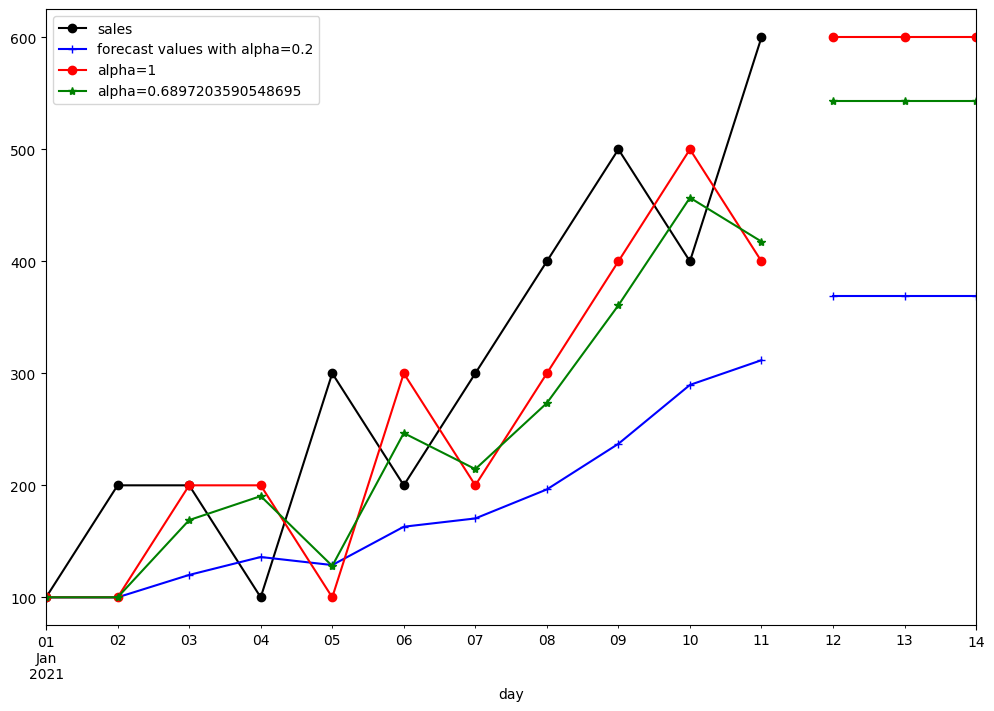

In [5]:
#Compare with multiple alpha values

 
#Second Instance
ins2 = SimpleExpSmoothing(train).fit(smoothing_level=1,optimized=False)
ins_cast2 = ins2.forecast(3).rename('alpha=1')

#Third Instance
ins3 = SimpleExpSmoothing(train).fit()
ins_cast3 = ins3.forecast(3).rename('alpha=%s'%ins3.model.params['smoothing_level'])

#After creating model we will visualize the plot
ax = train.plot(marker='o', color='black', figsize=(12,8), legend=True)

#Plot for alpha =0.2
ins_cast1.plot(marker='+', ax=ax, color='blue', legend=True)
ins1.fittedvalues.plot(marker='+', ax=ax, color='blue')

#Plot for alpha = 0.8
ins_cast2.plot(marker='o', ax=ax, color='red', legend=True)
ins2.fittedvalues.plot(marker='o', ax=ax, color='red')

#Plot for alpha=Optimized by statsmodel
ins_cast3.plot(marker='*', ax=ax, color='green', legend=True)
ins3.fittedvalues.plot(marker='*', ax=ax, color='green')


In [6]:
mse = mean_squared_error(test, ins_cast3.to_frame(), squared=False)
alpha = ins3.model.params['smoothing_level']
print('Alpha is : {} & RMSE is : {} '.format(alpha, mse))

Alpha is : 0.6897203590548695 & RMSE is : 175.34939317758125 


<h1>Double Exponential Smoothing

In [7]:
#Holt Winter's Linear smoothing / Double exponential smoothing

from statsmodels.tsa.holtwinters import Holt
model = Holt(np.asarray(train))
model

In [19]:
fit1 = model.fit(smoothing_level=0.13, smoothing_trend=1)
pred1 = fit1.forecast(3)
fit1.fittedvalues
pred1

C:\Users\EdwinVivekN\AppData\Roaming\Python\Python39\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


array([200.        , 274.        , 341.76      , 382.2824    ,
       367.840176  , 372.45621824, 341.05286662, 321.39507805,
       327.51144184, 368.25619091, 394.83081777])

array([470.62273684, 519.74266221, 568.86258759])

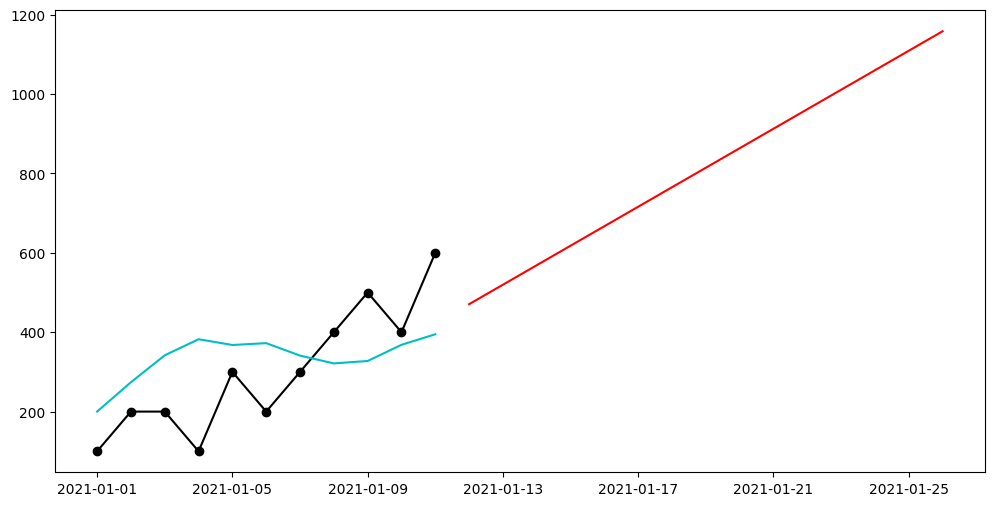

In [20]:
def daterangecalc(num, train, fit):
    index= pd.date_range(start= train.index.max().date() + datetime.timedelta(days=1), end=train.index.max().date() + datetime.timedelta(days=num), freq='D')
    prediction = fit.forecast(num)
    df = pd.DataFrame([index, prediction])
    df_t = df.T.set_index(index)
    return df_t


fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train, marker='o', color='black')
ax.plot(train.index[:], fit1.fittedvalues[:], color='c')
df  = daterangecalc(15, train, fit1)
ax.plot(df.index[:], df.iloc[:,1],  color='red')

C:\Users\EdwinVivekN\AppData\Roaming\Python\Python39\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


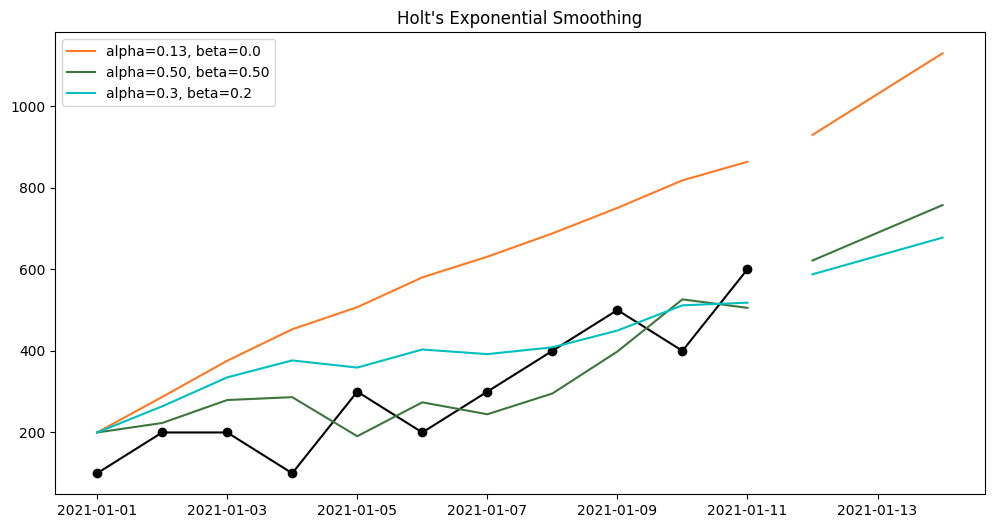

In [10]:
fit2 = model.fit(optimized=True)
pred2 = fit2.forecast(3)
fit3 = model.fit(smoothing_level=.3, smoothing_trend=.2)
pred3 = fit3.forecast(3)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train, marker='o', color='black')


for p, f, c in zip((pred1, pred2, pred3),(fit1, fit2, fit3),('#ff7823','#3c763d','c')):
    ax.plot(train.index[:], f.fittedvalues[:], color=c)
    ax.plot(test.index[:], p, label="alpha="+str(f.params['smoothing_level'])[:4]+", beta="+str(f.params['smoothing_trend'])[:4], color=c)
plt.title("Holt's Exponential Smoothing")
plt.legend();

C:\Users\EdwinVivekN\AppData\Roaming\Python\Python39\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


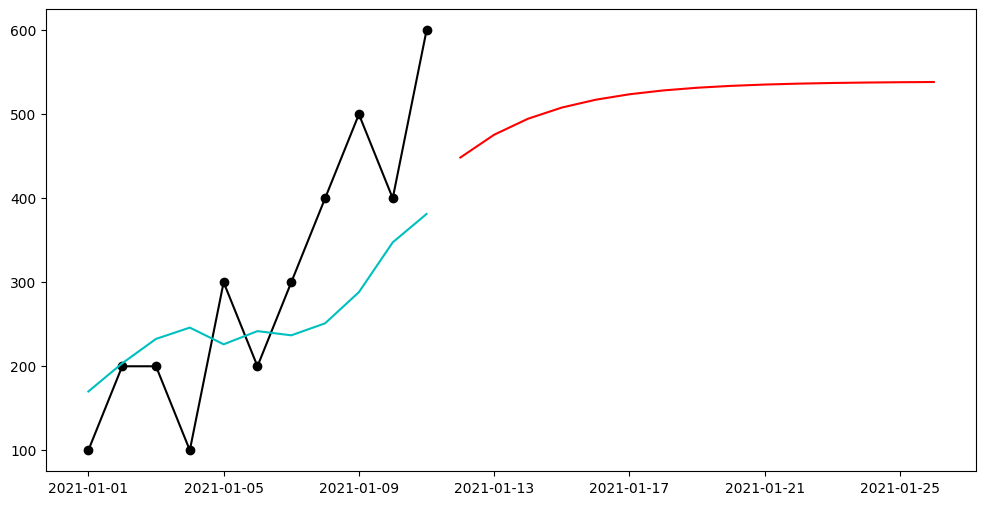

In [29]:
#Holt's Damped trend - Double exponential smoothing
damped_model = Holt(np.asarray(train), damped_trend=True)

fitd = damped_model.fit(smoothing_level=0.13, smoothing_trend=1, damping_trend=0.7)
df_d  = daterangecalc(15, train, fitd)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train, color='black', marker='o')
ax.plot(train.index[:], fitd.fittedvalues[:], color='c')
ax.plot(df_d.index[:], df_d.iloc[:,1],  color='red')

<h1>Triple Exponential Smoothing